In [1]:
import json

import numpy as np
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.metrics import roc_curve, roc_auc_score

from prompt_playground.actionclip import VARIATION_NAMES, images_features_df
from prompt_playground.actionclip_similarities import (
    SimilarityParams,
    TopClassificationMethod,
    clips_texts_similarities,
)

Created a temporary directory at /var/folders/yc/slfs2kzs1d72wd8b20xw0nf80000gn/T/tmp5ep8253d
Writing /var/folders/yc/slfs2kzs1d72wd8b20xw0nf80000gn/T/tmp5ep8253d/_remote_module_non_scriptable.py


In [2]:
LOCAL_STORAGE = json.loads(
    '[{"text":"a human running","classification":true},{"text":"a person running","classification":true},{"text":"a picture of a human climbing a ladder","classification":true},{"text":"a video of a human approaching a fence","classification":true},{"text":"an adult running","classification":true},{"text":"bird flying around","classification":false},{"text":"black and white picture","classification":false},{"text":"black and white picture of a human","classification":true},{"text":"black and white scene of horror movie","classification":false},{"text":"change of colorimetry","classification":false},{"text":"cloudy field with a fence","classification":false},{"text":"field at midnight","classification":false},{"text":"field with green grass","classification":false},{"text":"going through a fence","classification":true},{"text":"grayscale picture of a fence","classification":false},{"text":"grayscale picture of a human","classification":true},{"text":"horror movie scene","classification":false},{"text":"human against a wall","classification":true},{"text":"human approaching a fence","classification":true},{"text":"human bending down","classification":true},{"text":"human climbing a ladder","classification":true},{"text":"human climbing a ladder on a fence","classification":true},{"text":"human cutting a fence","classification":true},{"text":"human discretely moving towards a fence","classification":true},{"text":"human holding a ladder","classification":true},{"text":"human kneeling down","classification":true},{"text":"human making small steps","classification":true},{"text":"human pick locking","classification":true},{"text":"human stepping down","classification":true},{"text":"human unlocking a door","classification":true},{"text":"human walking","classification":true},{"text":"human wearing a coat","classification":true},{"text":"human wearing dark clothes","classification":true},{"text":"human wearing light cloths","classification":true},{"text":"human wearing white cloths","classification":true},{"text":"insect flying","classification":false},{"text":"ladder leaning against a fence","classification":true},{"text":"one person","classification":true},{"text":"person creep walking","classification":true},{"text":"person crip walking","classification":true},{"text":"picture with artefacts","classification":false},{"text":"plastic bag flying","classification":false},{"text":"plastic bag laying on the floor","classification":false},{"text":"putting a knee down","classification":true},{"text":"ripping a fence","classification":true},{"text":"video with artefacts","classification":false}]'
)

TEXTS = [o["text"] for o in LOCAL_STORAGE]
TEXT_CLASSIFICATIONS = [o["classification"] for o in LOCAL_STORAGE]

In [3]:
VARIATION = VARIATION_NAMES[1]
VARIATION

'vit-b-16-32f'

In [4]:
similarities = clips_texts_similarities(
    SimilarityParams(
        texts=TEXTS,
        classifications=TEXT_CLASSIFICATIONS,
        model_variation=VARIATION,
        text_classification_method=TopClassificationMethod.any,
        texts_to_subtract=[],
        apply_softmax=False,
    )
).similarities

list(similarities.keys()), list(similarities.values())[0]

(['SZTRA102b13_00_00_20.mov',
  'SZTEA203a_00_21_25.mov',
  'SZTEA203a_00_23_52.mov',
  'SZTEA102b_00_32_57.mov',
  'SZTEA103a_00_26_10.mov',
  'SZTRA102b06_00_00_02.mov',
  'SZTEA104a_00_47_00.mov',
  'SZTEA202a_00_13_50.mov',
  'SZTEA202b_00_08_07.mov',
  'SZTRA103a12_00_00_07.mov',
  'SZTRA202b02_00_00_19.mov',
  'SZTEA102b_00_15_22.mov',
  'SZTRA104a13_00_00_28.mov',
  'SZTEA102b_00_13_10.mov',
  'SZTEA203a_00_44_22.mov',
  'SZTEA202b_00_25_38.mov',
  'SZTEN101c_00_18_38.mov',
  'SZTRA103b10_00_01_20.mov',
  'SZTEA101b_00_24_02.mov',
  'SZTEA202a_00_11_16.mov',
  'SZTEA202b_00_40_44.mov',
  'SZTEA203a_00_39_42.mov',
  'SZTEA102a_00_16_09.mov',
  'SZTEA103a_00_42_09.mov',
  'SZTEA102a_00_23_50.mov',
  'SZTRN102a_00_31_56.mov',
  'SZTRA103a16_00_00_07.mov',
  'SZTEN101b_00_19_00.mov',
  'SZTRN103b_00_04_32.mov',
  'SZTEA102b_00_17_48.mov',
  'SZTEN103b_00_02_45.mov',
  'SZTEA203a_00_26_06.mov',
  'SZTEN102a_00_27_24.mov',
  'SZTRA203a17_00_00_10.mov',
  'SZTRA103b10_00_01_19.mov',
  

# First Clip experiment

In [5]:
clip0 = next(iter(similarities.keys()))
similarities0 = pd.DataFrame(
    [similarity.dict() for similarity in similarities[clip0]]
).sort_values("classification")
similarities0

text  classification  similarity
45          plastic bag laying on the floor           False    0.090376
21                   field with green grass           False    0.170278
20                        field at midnight           False    0.173252
29                       horror movie scene           False    0.160737
18                    change of colorimetry           False    0.174553
17                            insect flying           False    0.175674
32                     video with artefacts           False    0.158987
33                   picture with artefacts           False    0.158707
11             grayscale picture of a fence           False    0.220672
10                cloudy field with a fence           False    0.229345
25    black and white scene of horror movie           False    0.165392
36                  black and white picture           False    0.155323
40                       bird flying around           False    0.150655
42                       plastic bag flying           False    0.143114
26                      human stepping down            True    0.164180
37                         an adult running            True    0.152908
38                         a person running            True    0.152424
31                     human wearing a coat            True    0.159488
30                            human walking            True    0.160415
39                      putting a knee down            True    0.150709
41                          a human running            True    0.150514
43               human wearing dark clothes            True    0.140184
28                      human kneeling down            True    0.161377
27                      person crip walking            True    0.162800
35               human wearing white cloths            True    0.156236
34       black and white picture of a human            True    0.157108
0        human climbing a ladder on a fence            True    0.297388
23                 human making small steps            True    0.169518
1            ladder leaning against a fence            True    0.291067
2                   human climbing a ladder            True    0.272242
3    a picture of a human climbing a ladder            True    0.271745
4                    human holding a ladder            True    0.270864
5                     human cutting a fence            True    0.254585
6   human discretely moving towards a fence            True    0.241330
7                     going through a fence            True    0.233441
24             grayscale picture of a human            True    0.166480
8    a video of a human approaching a fence            True    0.231645
12                     human against a wall            True    0.208396
13                          ripping a fence            True    0.199386
14               human wearing light cloths            True    0.187898
15                   human unlocking a door            True    0.186217
16                     person creep walking            True    0.177507
19                               one person            True    0.174506
44                       human bending down            True    0.137149
9                 human approaching a fence            True    0.231435
22                       human pick locking            True    0.169642

In [6]:
groupby_classification = similarities0.groupby("classification")["similarity"]
weighted_similarity = groupby_classification.sum() / groupby_classification.count()
weighted_similarity

classification
False    0.166219
True     0.195024
Name: similarity, dtype: float64

In [7]:
weighted_similarity.loc[True] / weighted_similarity.loc[False]

1.1732981050769506

In [8]:
groupby_classification.count()

classification
False    14
True     32
Name: similarity, dtype: int64

# Apply ratio on entire dataset

In [9]:
alarms_series = images_features_df(VARIATION)["Alarm"]

df = (
    pd.DataFrame(
        [
            dict(clip=clip, y_true=alarms_series[clip], **v.dict())
            for clip, l in similarities.items()
            for v in l
        ]
    )
    .rename(columns={"classification": "y_predict"})
    .sort_values(["clip", "y_true", "y_predict", "text"])
    .reset_index(drop=True)
)
df.head(5)

clip  y_true                                   text  \
0  SZTEA101a_00_00_42.mov   False                     bird flying around   
1  SZTEA101a_00_00_42.mov   False                black and white picture   
2  SZTEA101a_00_00_42.mov   False  black and white scene of horror movie   
3  SZTEA101a_00_00_42.mov   False                  change of colorimetry   
4  SZTEA101a_00_00_42.mov   False              cloudy field with a fence   

   y_predict  similarity  
0      False    0.144516  
1      False    0.159767  
2      False    0.167280  
3      False    0.155367  
4      False    0.181464

In [10]:
unique_y_true = df["y_true"].unique()

fig = make_subplots(
    rows=1,
    cols=4,
    column_widths=[0.3, 0.2, 0.3, 0.2],
    shared_yaxes=True,
    y_title="similarity",
    subplot_titles=[f"y_true={y_true}" for y_true in unique_y_true for _ in range(2)],
)

# group by
#  1. y_true (facet)
#  2. y_predict / text class (color)
for i, y_true in enumerate(unique_y_true):
    facet_df = df[df["y_true"] == y_true]

    for y_predict, class_color in zip(
        sorted(facet_df["y_predict"].unique()), ["CornflowerBlue", "Tomato"]
    ):
        facet_color_df = facet_df[facet_df["y_predict"] == y_predict]

        violin_side = "positive" if y_predict else "negative"

        fig.add_scatter(
            x=facet_color_df["text"],
            y=facet_color_df["similarity"],
            marker=dict(color=class_color, size=3),
            hovertext=facet_color_df["clip"],
            mode="markers",
            name=f"y_predict={str(y_predict)}",
            legendgroup=f"y_true={str(y_true)}",
            legendgrouptitle=dict(text=f"y_true={str(y_true)}"),
            row=1,
            col=i * 2 + 1,
        )
        fig.update_layout(**{f"xaxis{i*2+1}": dict(title="text")})
        fig.add_violin(
            x=np.repeat(str(y_true), len(facet_color_df)),
            y=facet_color_df["similarity"],
            box=dict(visible=True),
            scalegroup=str(y_true),
            scalemode="count",
            width=1,
            meanline=dict(visible=True),
            side=violin_side,
            marker=dict(color=class_color),
            showlegend=False,
            row=1,
            col=i * 2 + 2,
        )

fig.update_layout(height=900, violingap=0, violinmode="overlay")
fig.show()

In [11]:
groupby_classification = df.groupby(["clip", "y_predict"])["similarity"]
weighted_similarity = groupby_classification.sum() / groupby_classification.count()
weighted_similarity

clip                    y_predict
SZTEA101a_00_00_42.mov  False        0.160093
                        True         0.167990
SZTEA101a_00_04_47.mov  False        0.156986
                        True         0.162169
SZTEA101a_00_05_37.mov  False        0.183398
                                       ...   
SZTRN202d_00_12_32.mov  True         0.157057
SZTRN203a_00_00_45.mov  False        0.132925
                        True         0.159841
SZTRN203a_00_10_40.mov  False        0.131542
                        True         0.158638
Name: similarity, Length: 1718, dtype: float64

In [12]:
ratio = weighted_similarity.groupby(level="clip").aggregate(
    lambda s: s.loc[:, True] / s.loc[:, False]
)
ratio

clip
SZTEA101a_00_00_42.mov    1.049331
SZTEA101a_00_04_47.mov    1.033014
SZTEA101a_00_05_37.mov    0.958524
SZTEA101a_00_08_58.mov    0.956871
SZTEA101a_00_12_12.mov    1.032636
                            ...   
SZTRN202d_00_09_52.mov    1.219644
SZTRN202d_00_11_17.mov    1.209355
SZTRN202d_00_12_32.mov    1.219540
SZTRN203a_00_00_45.mov    1.202486
SZTRN203a_00_10_40.mov    1.205987
Name: similarity, Length: 859, dtype: float64

In [13]:
ratio_df = ratio.to_frame("ratio")
ratio_df["y_true"] = alarms_series.loc[ratio_df.index]
ratio_df

ratio  y_true
clip                                    
SZTEA101a_00_00_42.mov  1.049331   False
SZTEA101a_00_04_47.mov  1.033014   False
SZTEA101a_00_05_37.mov  0.958524    True
SZTEA101a_00_08_58.mov  0.956871    True
SZTEA101a_00_12_12.mov  1.032636    True
...                          ...     ...
SZTRN202d_00_09_52.mov  1.219644   False
SZTRN202d_00_11_17.mov  1.209355   False
SZTRN202d_00_12_32.mov  1.219540   False
SZTRN203a_00_00_45.mov  1.202486   False
SZTRN203a_00_10_40.mov  1.205987   False

[859 rows x 2 columns]

In [14]:
fig = px.scatter(
    ratio_df.sort_values(["y_true", "ratio"]),
    y="ratio",
    color="y_true",
    render_mode="line",
    marginal_y="violin",
    height=900,
)
fig.show()

In [15]:
fpr, tpr, thresholds = roc_curve(ratio_df["y_true"], ratio_df["ratio"])
auc_score = roc_auc_score(ratio_df["y_true"], ratio_df["ratio"])

In [16]:
roc_df = pd.DataFrame(
    {
        "False Positive Rate": fpr,
        "True Positive Rate": tpr,
        "Threshold": thresholds
    },
    columns=pd.Index(["False Positive Rate", "True Positive Rate", "Threshold"], name="Rate"),
    index=pd.Index(thresholds, name="Thresholds"),
)
px.line(
    roc_df,
    x="False Positive Rate",
    y="True Positive Rate",
    hover_data=["Threshold"],
    title=f"{VARIATION} - AUC: {auc_score:.5f}",
    color_discrete_sequence=["orange"],
    range_x=[0, 1],
    range_y=[0, 1],
    width=600,
    height=450,
).add_shape(type="line", line=dict(dash="dash"), x0=0, x1=1, y0=0, y1=1)

In [17]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(ratio_df["y_true"], ratio_df["ratio"])

In [18]:
precision

array([0.50291036, 0.5034965 , 0.50408401, 0.5046729 , 0.50526316,
       0.5058548 , 0.50644783, 0.50704225, 0.50763807, 0.50823529,
       0.50883392, 0.50943396, 0.51003542, 0.5106383 , 0.5112426 ,
       0.51184834, 0.51126928, 0.51187648, 0.51248514, 0.51309524,
       0.51370679, 0.51431981, 0.51373955, 0.51435407, 0.51377246,
       0.51318945, 0.51380552, 0.51322115, 0.51383875, 0.51325301,
       0.51387214, 0.51449275, 0.51511487, 0.5157385 , 0.51515152,
       0.5157767 , 0.5164034 , 0.51703163, 0.51766139, 0.51829268,
       0.51892552, 0.5195599 , 0.52019584, 0.52083333, 0.5202454 ,
       0.52088452, 0.52152522, 0.52216749, 0.52281134, 0.52222222,
       0.52286774, 0.52351485, 0.52416357, 0.5248139 , 0.52546584,
       0.5261194 , 0.5267746 , 0.52743142, 0.52808989, 0.52875   ,
       0.52941176, 0.52882206, 0.52948557, 0.53015075, 0.52955975,
       0.52896725, 0.5296343 , 0.53030303, 0.52970923, 0.53037975,
       0.52978454, 0.53045685, 0.53113088, 0.53053435, 0.53121

In [19]:
recall

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.99768519, 0.99768519, 0.99768519, 0.99768519,
       0.99768519, 0.99768519, 0.99537037, 0.99537037, 0.99305556,
       0.99074074, 0.99074074, 0.98842593, 0.98842593, 0.98611111,
       0.98611111, 0.98611111, 0.98611111, 0.98611111, 0.9837963 ,
       0.9837963 , 0.9837963 , 0.9837963 , 0.9837963 , 0.9837963 ,
       0.9837963 , 0.9837963 , 0.9837963 , 0.9837963 , 0.98148148,
       0.98148148, 0.98148148, 0.98148148, 0.98148148, 0.97916667,
       0.97916667, 0.97916667, 0.97916667, 0.97916667, 0.97916667,
       0.97916667, 0.97916667, 0.97916667, 0.97916667, 0.97916667,
       0.97916667, 0.97685185, 0.97685185, 0.97685185, 0.97453704,
       0.97222222, 0.97222222, 0.97222222, 0.96990741, 0.96990741,
       0.96759259, 0.96759259, 0.96759259, 0.96527778, 0.96527

In [20]:
thresholds

array([0.8577905 , 0.86491984, 0.86952407, 0.87051329, 0.8759551 ,
       0.88708555, 0.89975147, 0.90380444, 0.90500865, 0.90799679,
       0.91561904, 0.91861862, 0.91868188, 0.91887232, 0.92106572,
       0.93077436, 0.93086052, 0.93585175, 0.93691061, 0.93737198,
       0.93772696, 0.93854784, 0.94010189, 0.94074262, 0.94086645,
       0.94256252, 0.94269882, 0.94343543, 0.94467168, 0.94577336,
       0.94613755, 0.94632769, 0.94668614, 0.94706569, 0.94717835,
       0.94770426, 0.94870519, 0.94916096, 0.94921334, 0.94929758,
       0.94974094, 0.94985051, 0.95018839, 0.9509275 , 0.95121413,
       0.95133778, 0.95138138, 0.95143606, 0.95152871, 0.95198803,
       0.95319302, 0.95433013, 0.95435403, 0.95438661, 0.95452487,
       0.95504335, 0.95622062, 0.95627739, 0.95640976, 0.95655998,
       0.95687132, 0.95757152, 0.95808095, 0.95852441, 0.9591682 ,
       0.9596501 , 0.95967884, 0.95976579, 0.95988972, 0.96078548,
       0.9614686 , 0.96154994, 0.96200911, 0.9629689 , 0.96366

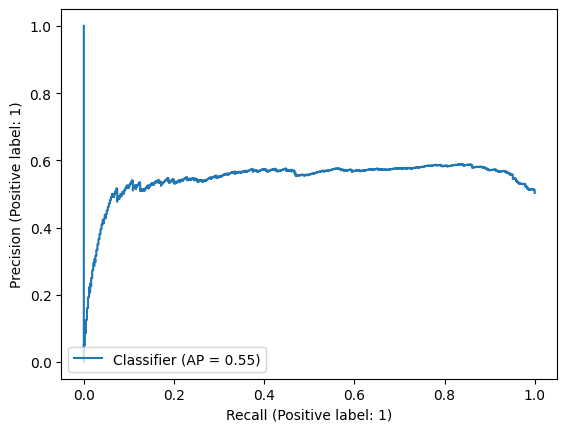

0.5438214776147201

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc, PrecisionRecallDisplay

PrecisionRecallDisplay.from_predictions(ratio_df["y_true"], ratio_df["ratio"])
plt.show()
auc_score = auc(recall, precision)
auc_score
